## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 분석용 데이터셋 구축
- 평가일 : 21.8.6
- 성명 :
- 점수 :

### Q1. 타이타닉 생존자 예측모델 개발을 위한 Titanic 분석용 데이터셋을 생성한 후 주어진 방법으로 예측 정확도를 평가하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

#### 점수 산정
- 예측 정확도 0.87 이상 50점
- 예측 정확도 0.85 이상 45점
- 예측 정확도 0.84 이하 정확도/2점

In [1]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [2]:
import pandas as pd
titanic_df = pd.read_csv('./dataset/titanic3.csv')
titanic_df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


###### copy

In [3]:
tdf = titanic_df.copy()

###### df check

In [4]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
tdf.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

    cabin / boat/ body / home.dest 는 결측값이 매우 많아서 사용하지 않는다.

In [6]:
tdf = tdf.drop(['cabin','boat','body','home.dest'],axis=1)

    도메인과 분석이 어려운 ticket 또한 정리한다

In [7]:
tdf = tdf.drop(['ticket'],axis=1)
print(tdf.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


#### 사용 DF

In [8]:
tdf.head(1)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S


### Column 탐색

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


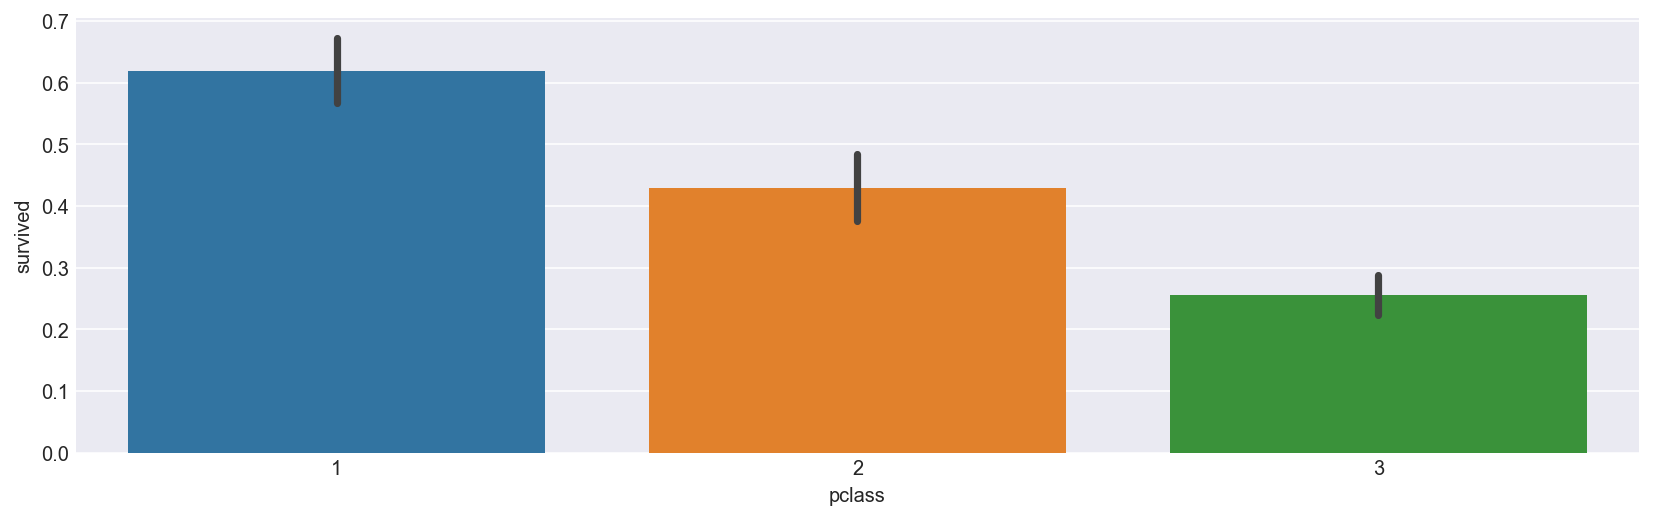

In [9]:
import seaborn as sns
sns.barplot(data=tdf,x='pclass',y='survived')
class_group = tdf.groupby('pclass')[['survived']].mean()
class_group

    pclass는 1 - 3 까지 나눠져있고, 생존확률은 class 1 이 가장 높다.
    따라서 상관계수가 높다고 판단, pclass 컬럼은 예측모델에 그대로 사용한다.

    Age를 보는 방법은 총 3가지로 구성됨.
    1. nan 값을 drop
    2. mean 값을 채워넣기
    3. median 값을 채워널기
    4. 각각의 컬럼에 알맞는 컬럼을 채워넣기 - 차후 시간되면 확인
    각각을 알아보자

Text(0.5, 1.0, 'fill_median')

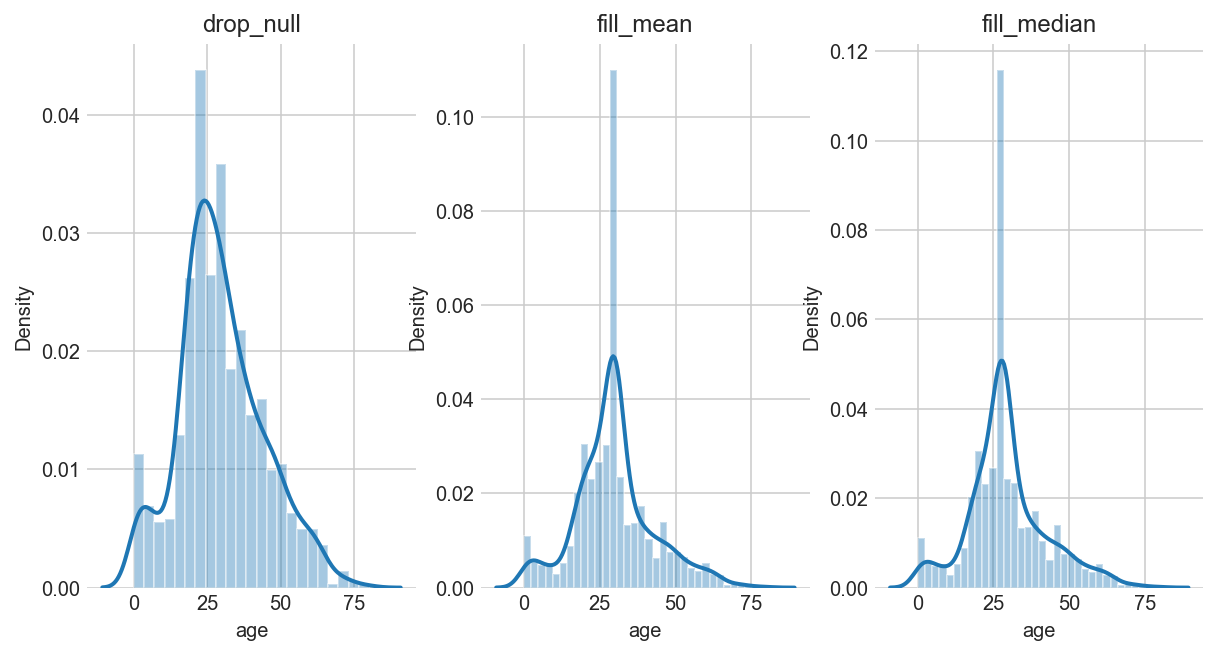

In [10]:
drop_null= tdf.dropna(subset=['age'],how='any',axis=0)

fill_mean= tdf.copy()
fill_mean['age']= tdf['age'].fillna(tdf['age'].mean())

fill_median = tdf.copy()
fill_median['age']= tdf['age'].fillna(tdf['age'].median())
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(drop_null['age'],ax=ax1)
sns.distplot(fill_mean['age'],ax=ax2)
sns.distplot(fill_median['age'],ax=ax3)

ax1.set_title('drop_null')
ax2.set_title('fill_mean')
ax3.set_title('fill_median')

    분포도에 따르면 kde 밀도선이 가장 많이 포함하는 것은 drop_null값이다.
    하지만 drop_null의 경우에는 많은 값들이 사라진다는 단점이 있다.
    mean 과 median은 해당 나이에 밀도가 많이 높아지므로 왜곡되는 단점이 있으므로 쓰지 않는다.

In [11]:
tdf[['name']].head(1) #결측값 없음

#사용자 함수 생성
def get_title(x):
    return x.split(', ')[1].split('. ')[0]
tdf['title'] = tdf['name'].apply(lambda x : get_title(x))
tdf['title'].unique()
tdf['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
Dona              1
the Countess      1
Don               1
Mme               1
Jonkheer          1
Lady              1
Sir               1
Name: title, dtype: int64

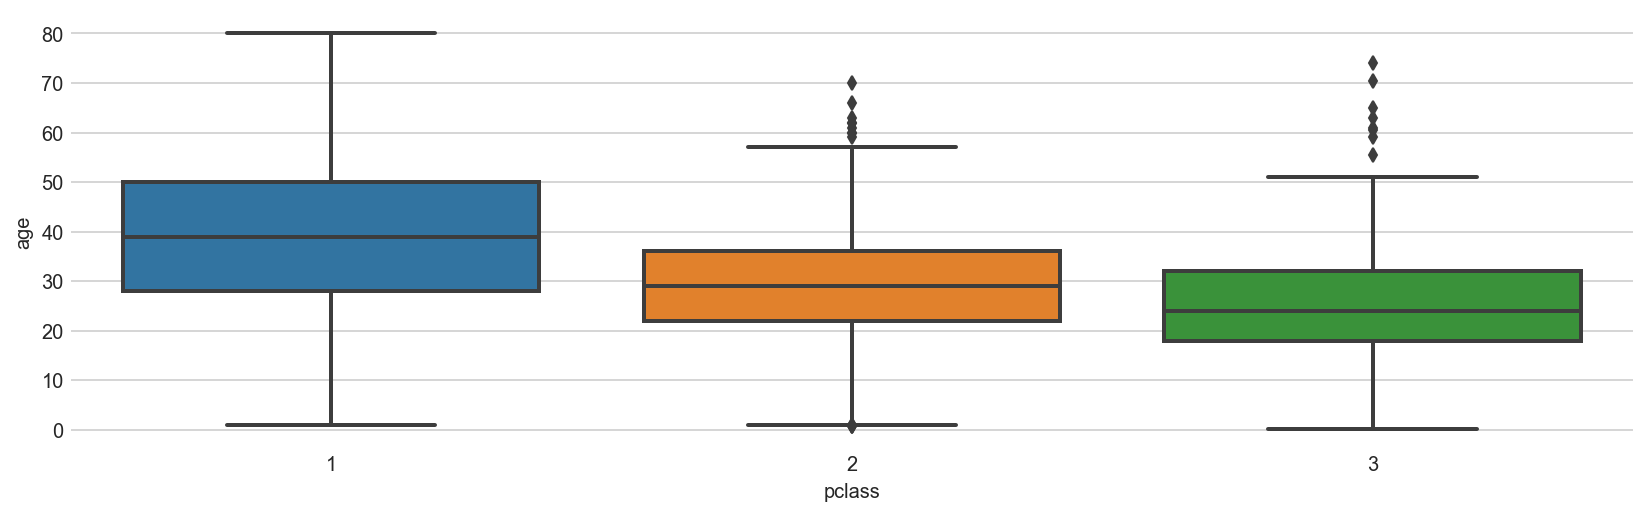

In [12]:
tdf1 = tdf.copy()
sns.boxplot(data=tdf1,x='pclass',y='age')
# display(tdf[(tdf['pclass']==1)&(tdf['title']=='Mr')]['age'].describe())
# display(tdf[(tdf['pclass']==2)&(tdf['title']=='Mr')]['age'].describe())
# display(tdf[(tdf['pclass']==3)&(tdf['title']=='Mr')]['age'].describe())

tdf1[(tdf1['pclass'] == 1) & (tdf1['age'].isnull()==1)][['title','age']]
tdf1[(tdf1['pclass'] == 1)&(tdf1['title']=='Mr')]['age'].describe()

p1 = tdf1[(tdf1['pclass']==1)&(tdf1['age'].isnull()==1)]
p2 = tdf1[(tdf1['pclass']==2)&(tdf1['age'].isnull()==1)]
p3 = tdf1[(tdf1['pclass']==3)&(tdf1['age'].isnull()==1)]

title_list = tdf1['title'].unique().tolist()

for i in title_list:
    p1.loc[p1['title']==i,'age'] = tdf1[(tdf1['pclass']==1) & (tdf1['title']==i)]['age'].mean()
    p2.loc[p2['title']==i,'age'] = tdf1[(tdf1['pclass']==2) & (tdf1['title']==i)]['age'].mean()
    p3.loc[p3['title']==i,'age'] = tdf1[(tdf1['pclass']==3) & (tdf1['title']==i)]['age'].mean()
    
tdf1[(tdf1['pclass']==1)&(tdf1['age'].isnull()==1)] = p1
tdf1[(tdf1['pclass']==2)&(tdf1['age'].isnull()==1)] = p2
tdf1[(tdf1['pclass']==3)&(tdf1['age'].isnull()==1)] = p3

    각각의 클래스 - 타이틀 별로 평균값을 지정해주어 결측값을 채워 넣었다.

Text(0.5, 1.0, 'fill_mean_by_class_title')

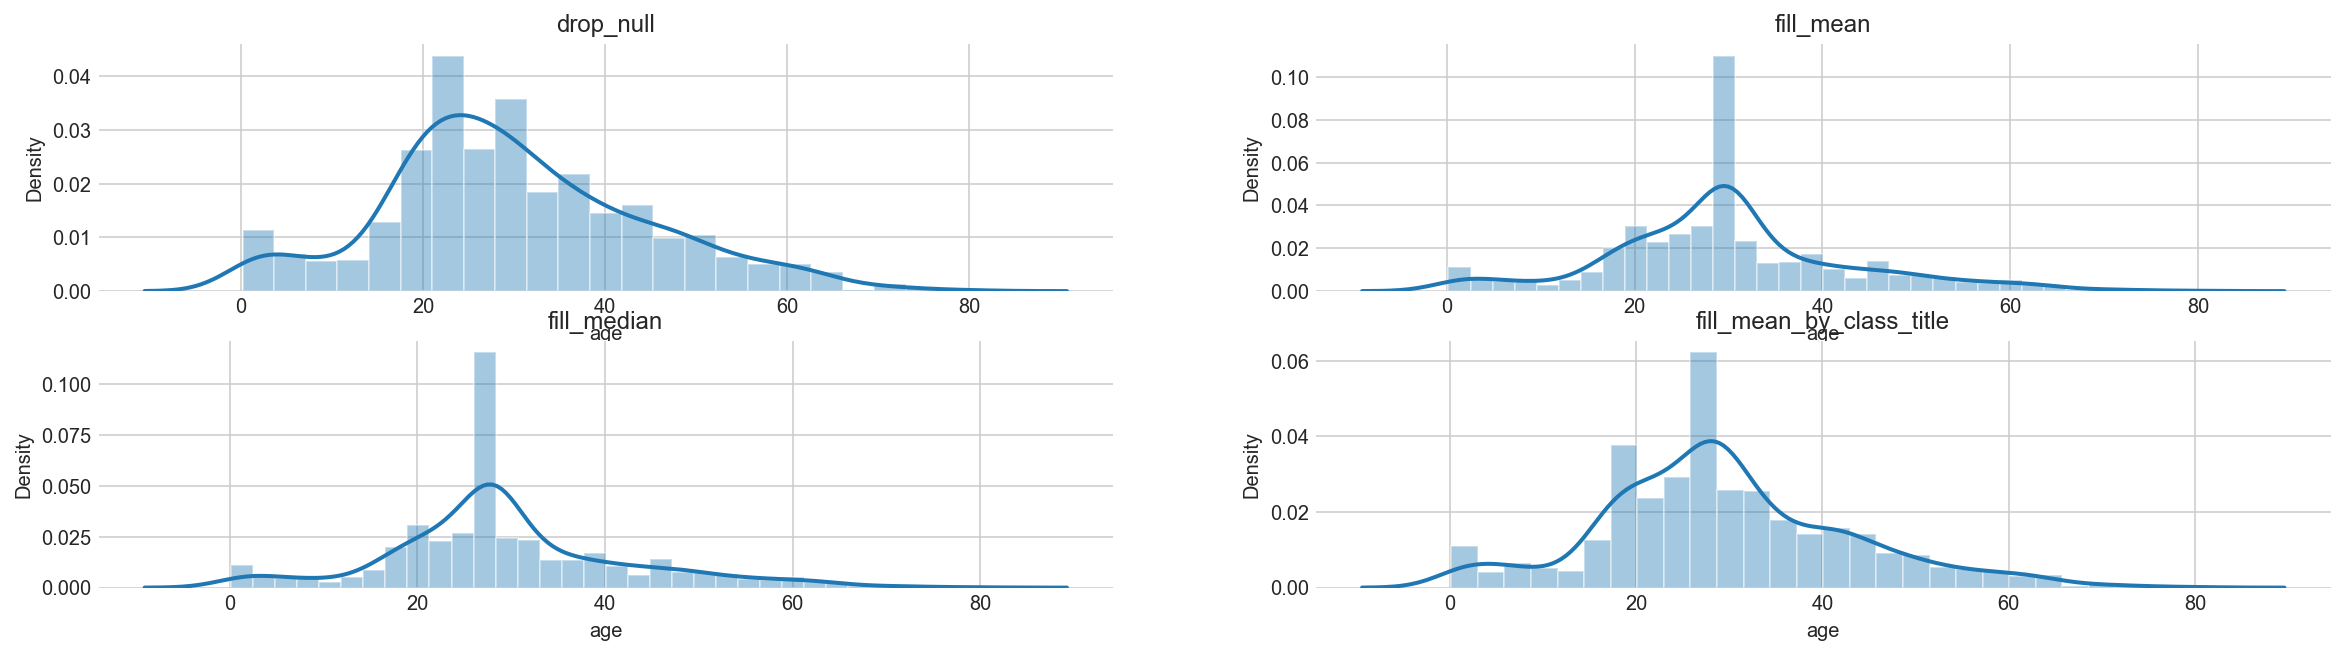

In [13]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.distplot(drop_null['age'],ax=ax1)
sns.distplot(fill_mean['age'],ax=ax2)
sns.distplot(fill_median['age'],ax=ax3)
sns.distplot(tdf1['age'],ax=ax4)

ax1.set_title('drop_null')
ax2.set_title('fill_mean')
ax3.set_title('fill_median')
ax4.set_title('fill_mean_by_class_title')

    dropnull과 fill_mean_by_class_title 는 밀도선이 골고루 퍼져있지만, 더 아우르는 것은 drop_null 임으로 예측모델은 drop_null을 사용한다.

In [14]:
display(tdf['embarked'].value_counts())
print('제일 많은 값 > ' , tdf['embarked'].value_counts().idxmax())
print(tdf['embarked'].isnull().sum())
tdf['embarked'] = tdf['embarked'].fillna('S')
print(tdf['embarked'].isnull().sum())

S    914
C    270
Q    123
Name: embarked, dtype: int64

제일 많은 값 >  S
2
0


In [15]:
display(tdf[tdf['fare'].isna()==1])
tdf[(tdf['pclass']==3) & (tdf['title']=='Mr')]['fare'].describe().mean()
tdf['fare'] = tdf['fare'].fillna(tdf[(tdf['pclass']==3) & (tdf['title']=='Mr')]['fare'].describe().mean()) 
display(tdf.iloc[1225])

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Mr


pclass                       3
survived                     0
name        Storey, Mr. Thomas
sex                       male
age                       60.5
sibsp                        0
parch                        0
fare                 70.243385
embarked                     S
title                       Mr
Name: 1225, dtype: object

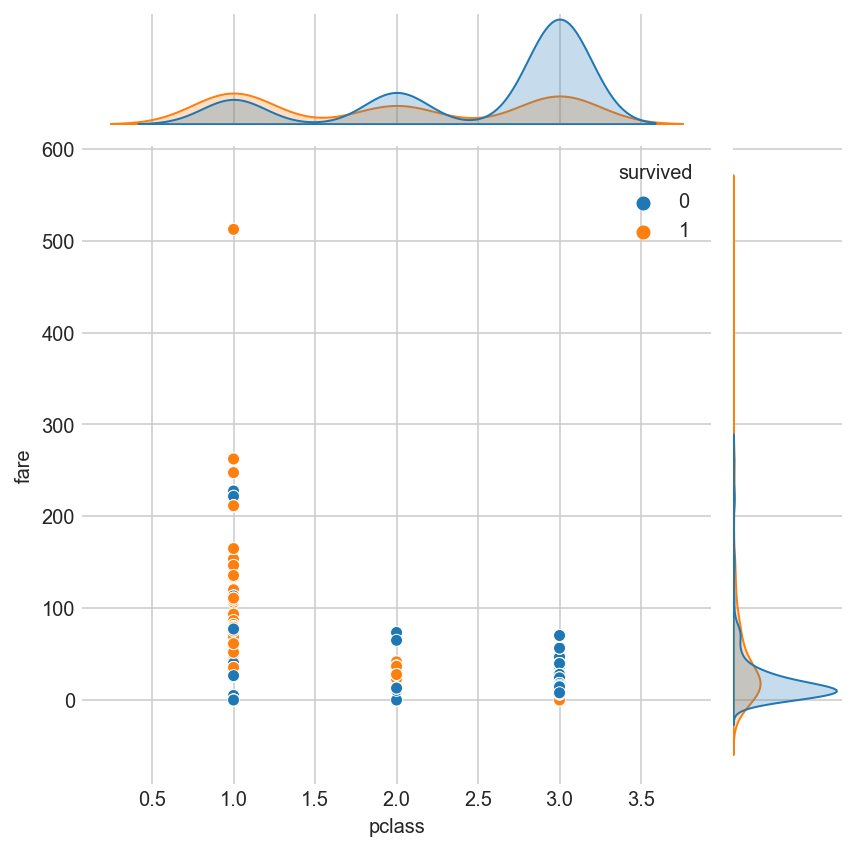

In [16]:
sns.jointplot(data=tdf,x='pclass',y='fare',hue='survived')

    fare를 모두 적용완료. 차후 category화 시켜서 넣어봄
    하지만 fare의 자체는 pclass자체와 연관이 되어 있다.

#### Category

<AxesSubplot:xlabel='fare', ylabel='Count'>

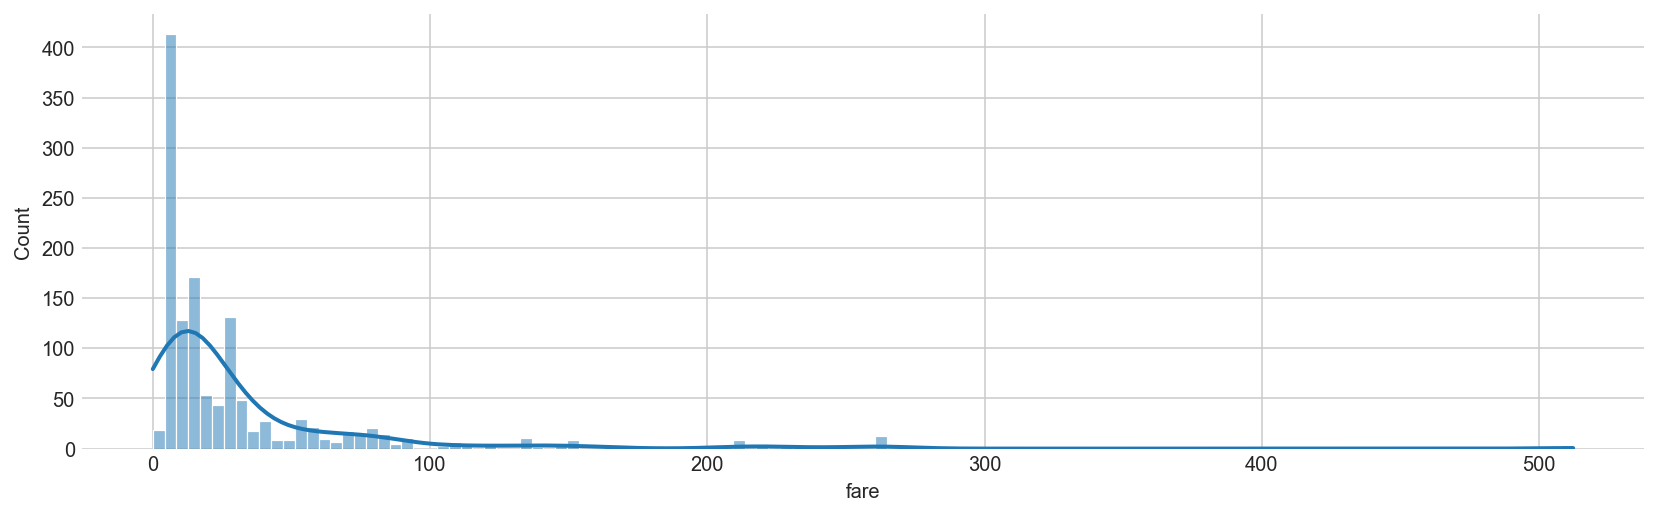

In [17]:
sns.histplot(tdf['fare'], kde=True)

In [18]:
tdf['fare_range'] = pd.cut(tdf['fare'],4)
tdf[['fare_range', 'survived']].groupby(['fare_range'], as_index=False).mean().sort_values(by='fare_range', ascending=True)

,fare_range,survived
0,"(-0.512, 128.082]",0.364734
1,"(128.082, 256.165]",0.660000
2,"(256.165, 384.247]",0.769231
3,"(384.247, 512.329]",1.000000


<AxesSubplot:xlabel='fare_cat', ylabel='count'>

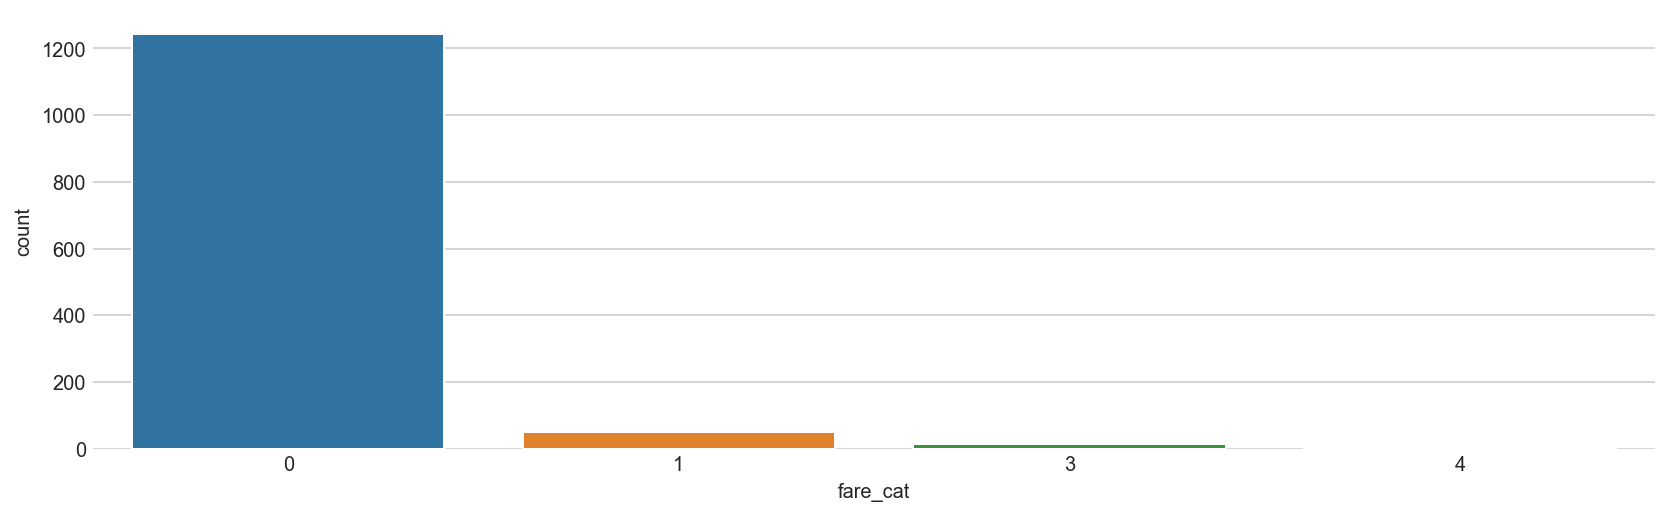

In [19]:
def fare_cat(x):
    cat = ''
    if x <= 128.082 : cat = 0
    elif x <= 256.165 : cat = 1
    elif x <= 28 : cat = 2
    elif x <= 384.247 : cat = 3
    else: cat = 4
    return cat

tdf['fare_cat'] = tdf['fare'].apply(lambda x : fare_cat(x))
tdf[['fare','fare_cat']].head(1)
sns.countplot('fare_cat',data=tdf)

    하지만 이것도 pclass와 연관될 가능성이 매우 높고,
    fare_cat을 사용할 경우 지표 0이 매우 높기 때문에,
    fare_cat을 바꾸던지
    pclass로 대체하는 방안이 좋다.
    현재는 pclass로 사용

2. age 

In [20]:
print(tdf['age'].isnull().sum())
tdf= tdf.dropna(subset=['age'],how='any',axis=0)
print(tdf['age'].isnull().sum())

263
0


In [21]:
tdf['age_range'] = pd.cut(tdf['age'],5)
tdf[['age_range', 'survived']].groupby(['age_range'], as_index=False).mean().sort_values(by='age_range', ascending=True)

,age_range,survived
0,"(0.0902, 16.136]",0.552239
1,"(16.136, 32.102]",0.375954
2,"(32.102, 48.068]",0.397770
3,"(48.068, 64.034]",0.443396
4,"(64.034, 80.0]",0.153846


<AxesSubplot:xlabel='age_cat', ylabel='count'>

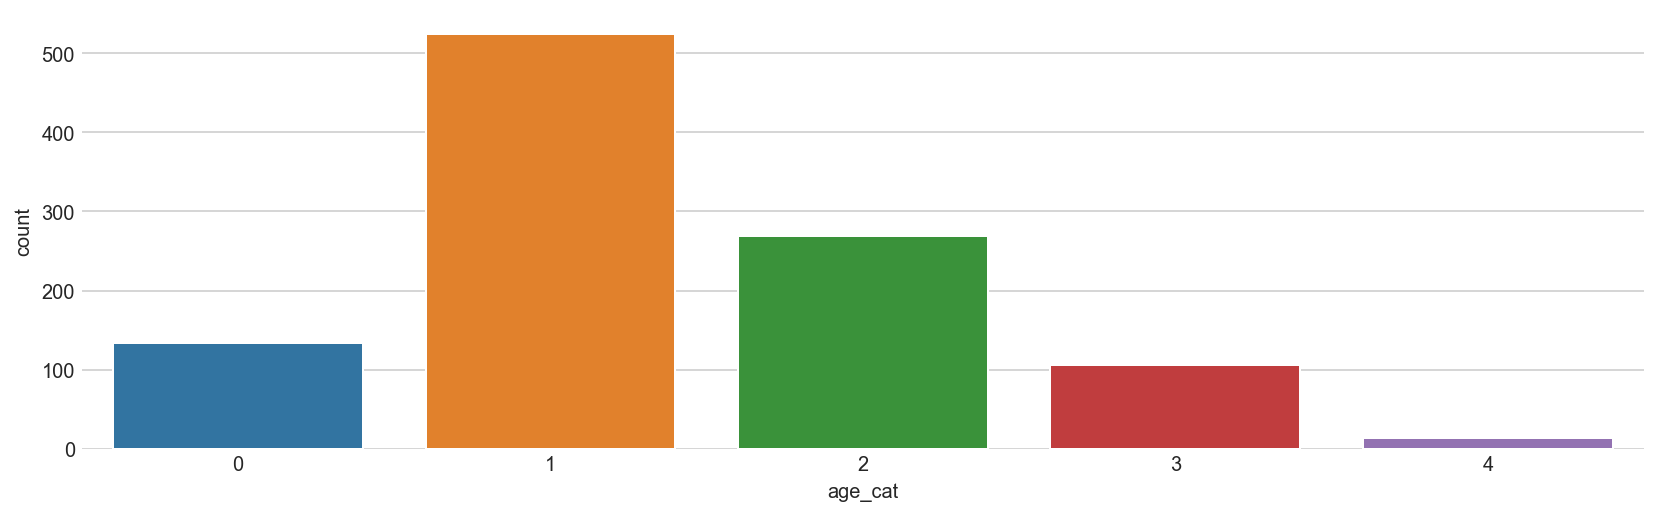

In [22]:
def get_cat(age):
    cat = ''
    if age < 16.136: cat = 0
    elif age < 32.102: cat = 1
    elif age < 48.068: cat = 2
    elif age < 64.034: cat = 3
    else: cat = 4
    return cat

tdf['age_cat'] = tdf['age'].apply(lambda x: get_cat(x))
sns.countplot('age_cat',data=tdf)

In [23]:
def title_cat(x):
    if x == 'Mr': cat = 0
    elif x == 'Miss' : cat = 1
    elif x == 'Mrs': cat = 2
    elif x == 'Master': cat = 3
    else:
        cat = 4
    return cat

tdf['title_cat'] = tdf['title'].apply(lambda x : title_cat(x))
tdf[['title','title_cat']]

,title,title_cat
0,Miss,1
1,Master,3
2,Miss,1
3,Mr,0
4,Mrs,2
...,...,...
1301,Mr,0
1304,Miss,1
1306,Mr,0
1307,Mr,0


#### Encoding

In [24]:
onehot_sex = pd.get_dummies(tdf['sex'])
onehot_embarked = pd.get_dummies(tdf['embarked'], prefix='town')
tdf = pd.concat([tdf,onehot_sex,onehot_embarked], axis=1)
tdf.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,fare_range,fare_cat,age_range,age_cat,title_cat,female,male,town_C,town_Q,town_S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S,Miss,"(128.082, 256.165]",1,"(16.136, 32.102]",1,1,1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,Master,"(128.082, 256.165]",1,"(0.0902, 16.136]",0,3,0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S,Miss,"(128.082, 256.165]",1,"(0.0902, 16.136]",0,1,1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S,Mr,"(128.082, 256.165]",1,"(16.136, 32.102]",1,0,0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S,Mrs,"(128.082, 256.165]",1,"(16.136, 32.102]",1,2,1,0,0,0,1


    우선 one_hot encoding을 사용해본다.
    사용은 'age_cat','pclass','male','female','town_C','town_Q','town_S','survived'

In [25]:
one_hot = tdf[['age_cat','pclass','male','female','town_C','town_Q','town_S','survived']]   # 85 %가 나온다.

    다음은 Label encoding을 사용해본다
    사용은 'age_cat','pclass','sex','embarked','survived'

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['sex','embarked']
for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf[['sex','embarked']].head(1)

,sex,embarked
0,0,2


In [27]:
label_E = tdf[['age_cat','pclass','sex','embarked','survived']] # 마찬가지로 85% 가 반환

        embarked를 제외하고 진행

In [28]:
label_ = tdf[['pclass','survived','sex','age_cat']] # randomstate - 5 로 변환/ 최종 87% 반환완료.

In [29]:
label_

,pclass,survived,sex,age_cat
0,1,1,0,1
1,1,1,1,0
2,1,0,0,0
3,1,0,1,1
4,1,0,0,1
...,...,...,...,...
1301,3,0,1,2
1304,3,0,0,0
1306,3,0,1,1
1307,3,0,1,1


In [30]:
# 모델 평가 준비 작업
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = label_['survived'] # 종속변수
X_t_df = label_.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 5)

print(X_train.shape)
print(X_test.shape)


(836, 3)
(210, 3)


In [31]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.87, lr 정확도:0.81


### Q2. 고객 속성 및 거래 데이터를 아래 제시된 방법으로 생성 후 다음 과제를 수행하세요.

[고객별 속성 데이터]  
- id : 1번 ~ 100번 일련번호
- gender : 0,1 정수 난수 생성
- age : 10 ~ 80사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region : 1 ~ 5 사이 정수 난수 생성

[거래 데이터]  
- id : 1번 ~ 100번 일련번호(관측치 1000개)
- product : 고급제품(hpd), 일반제품(lpd)로 구분
- price : 100 ~ 200 사이 정수 난수 생성
- qty : 1 ~ 2 사이 정수 난수 생성
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount : price * qty로 산출

[과제]  
- 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
- df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요
- df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

#### 점수 산정
- 인사이트 개수에 따라 점수 부여: 5개 50점,4개 45점,3개 40점,2개 35점,1개 30점

In [32]:
# 인사이트 예시(요약 기술 및 관련 통계 및 시각화 제시)
# 일반제품의 변화율인 lpd 컬럼과 구매증감율 ratio의 상관관계가 0.5 초과

In [33]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

#### 고객 속성 데이터

In [34]:
import numpy as np
import pandas as pd
np.random.seed(0)
no = np.arange(1,101)
nS = pd.Series(no)

gender = np.random.randint(2,size=100)
gS = pd.Series(gender)

age=np.random.randint(10,81,size=100)
aS = pd.Series(age)

region = np.random.randint(1,6,size=100)
rS = pd.Series(region)

at_df = pd.concat([nS,gS,aS,rS],axis=1)
at_df= at_df.rename(columns={0:'no',1:'gender',2:'age',3:'region'})
at_df.head()

,no,gender,age,region
0,1,0,52,4
1,2,1,78,3
2,3,1,16,4
3,4,0,78,3
4,5,1,57,5


    각기 다른 age를 category

In [35]:
at_df['age_range'] = pd.cut(at_df['age'],5)
display(at_df[['age_range','age']].groupby(['age_range']).mean())
def age_cat(x):
    cat=''
    if x < 24:
        cat = 0
    elif x < 38:
        cat = 1
    elif x < 52:
        cat = 2
    elif x < 66:
        cat = 3
    else:
        cat = 4
    return cat
at_df['age_cat'] = at_df['age'].apply(lambda x : age_cat(x))
at_df = at_df.drop(['age','age_range'],axis=1)
at_df.head()

,age
age_range,
"(9.93, 24.0]",16.636364
"(24.0, 38.0]",31.611111
"(38.0, 52.0]",46.571429
"(52.0, 66.0]",59.736842
"(66.0, 80.0]",73.850000


,no,gender,region,age_cat
0,1,0,4,3
1,2,1,3,4
2,3,1,4,0
3,4,0,3,4
4,5,1,5,3


In [36]:
customer = at_df.copy()

#### 거래 데이터

In [37]:
data = np.zeros((1000,6))
pc_df = pd.DataFrame(data,columns=['no','product','price','qty','day','date'])
pc_df.head()

,no,product,price,qty,day,date
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
np.random.seed(1)
pc_df['no'] = np.random.randint(1,101,1000)
pc_df['product'] = np.random.randint(1,3,1000)
pc_df['price'] = np.random.randint(100,200,1000)
pc_df['qty'] = np.random.randint(1,3,1000)
pc_df['day'] = np.random.choice(['MON','TUE','WED','THU','FRI','SAT','SUN'],1000)
pc_df['date'] = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
pc_df['year'] = pc_df['date'].dt.year

In [39]:
pc_df.head(2)

,no,product,price,qty,day,date,year
0,38,2,159,2,SAT,2020-01-01 00:00:00.000000000,2020
1,13,1,117,2,TUE,2020-01-01 17:32:15.135135135,2020


In [40]:
pc_df['price'].unique()

array([159, 117, 122, 154, 113, 130, 123, 150, 121, 171, 103, 112, 177,
       107, 152, 126, 108, 196, 184, 181, 173, 139, 156, 160, 125, 165,
       195, 199, 127, 118, 186, 101, 134, 102, 185, 111, 193, 153, 182,
       183, 100, 151, 191, 132, 105, 169, 109, 146, 174, 138, 142, 163,
       140, 131, 192, 179, 168, 149, 180, 194, 114, 110, 104, 198, 141,
       135, 166, 161, 175, 136, 172, 143, 155, 137, 124, 119, 144, 120,
       116, 178, 167, 162, 133, 189, 129, 176, 197, 164, 158, 106, 170,
       147, 188, 187, 145, 148, 157, 190, 128, 115])

#### 과제

    # 추가 변환변수 - 년 월 일 - random date

In [41]:
pc_df = pc_df.drop(['day','year'],axis=1)

In [42]:
pc_df['year'] = pc_df['date'].dt.year
pc_df['month'] = pc_df['date'].dt.month
pc_df['day'] = pc_df['date'].dt.day
pc_df['dw'] = pc_df['date'].dt.weekday
pc_df['dw'] = pc_df['dw'].replace({0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}) 
pc_df = pc_df.drop('date',axis=1)
pc_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [43]:
pc_df

,no,product,price,qty,year,month,day,dw
0,38,2,159,2,2020,1,1,WED
1,13,1,117,2,2020,1,1,WED
2,73,1,122,2,2020,1,2,THU
3,10,2,154,2,2020,1,3,FRI
4,76,2,113,2,2020,1,3,FRI
...,...,...,...,...,...,...,...,...
995,44,2,117,1,2021,12,28,TUE
996,75,2,117,2,2021,12,28,TUE
997,99,2,155,1,2021,12,29,WED
998,98,2,143,1,2021,12,30,THU


In [44]:
# product별 가격 변환

In [45]:
def pddiff(product, price):
    if product == 1:
        return price * 30
    else:
        return price * 10
    return 
pc_df['price'] = pc_df.apply(lambda x : pddiff(x['product'],x['price']),axis=1)
pc_df[['product','price']].head(1)

,product,price
0,2,1590


In [46]:
# product별 qty 변환

In [47]:
def qtydiff(product,qty):
    if product == 2:
        return qty * 2
    else:
        return qty
pc_df['qty'] = pc_df.apply(lambda x : qtydiff(x['product'],x['qty']),axis=1)
pc_df.head()

,no,product,price,qty,year,month,day,dw
0,38,2,1590,4,2020,1,1,WED
1,13,1,3510,2,2020,1,1,WED
2,73,1,3660,2,2020,1,2,THU
3,10,2,1540,4,2020,1,3,FRI
4,76,2,1130,4,2020,1,3,FRI


In [48]:
# 총량 파생

In [49]:
pc_df['amount'] = pc_df['qty'] * pc_df['price']

In [50]:
pc_df

,no,product,price,qty,year,month,day,dw,amount
0,38,2,1590,4,2020,1,1,WED,6360
1,13,1,3510,2,2020,1,1,WED,7020
2,73,1,3660,2,2020,1,2,THU,7320
3,10,2,1540,4,2020,1,3,FRI,6160
4,76,2,1130,4,2020,1,3,FRI,4520
...,...,...,...,...,...,...,...,...,...
995,44,2,1170,2,2021,12,28,TUE,2340
996,75,2,1170,4,2021,12,28,TUE,4680
997,99,2,1550,2,2021,12,29,WED,3100
998,98,2,1430,2,2021,12,30,THU,2860


In [51]:
purchase = pc_df.copy()

In [52]:
purchase.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1821330
         2021    1872000
2        2020    1107800
         2021    1055600
Name: amount, dtype: int64

##### 병합

In [53]:
def pdcut(year,product,qty):
    if (year==2021) & (product==1):
        return qty * 2
    else:
        return qty * 3
purchase['qty'] = purchase.apply(lambda x : pdcut(x['year'],x['product'],x['qty']),axis=1)
purchase.head()

,no,product,price,qty,year,month,day,dw,amount
0,38,2,1590,12,2020,1,1,WED,6360
1,13,1,3510,6,2020,1,1,WED,7020
2,73,1,3660,6,2020,1,2,THU,7320
3,10,2,1540,12,2020,1,3,FRI,6160
4,76,2,1130,12,2020,1,3,FRI,4520


In [54]:
purchase.groupby(['product','year'])['qty'].sum() #제품 물량의 차이가 높다

product  year
1        2020    1206
         2021     814
2        2020    2214
         2021    2106
Name: qty, dtype: int64

In [55]:
def pdcut(year,product,price):
    if (year==2021) & (product==1):
        return price * 0.7
    else:
        return price * 0.5
purchase['price'] = purchase.apply(lambda x : pdcut(x['year'],x['product'],x['price']),axis=1)
purchase.head()

,no,product,price,qty,year,month,day,dw,amount
0,38,2,795.0,12,2020,1,1,WED,6360
1,13,1,1755.0,6,2020,1,1,WED,7020
2,73,1,1830.0,6,2020,1,2,THU,7320
3,10,2,770.0,12,2020,1,3,FRI,6160
4,76,2,565.0,12,2020,1,3,FRI,4520


In [56]:
# 구매율 변화
purchase['y_p'] = purchase[['year','product']].astype(str).apply('_'.join,axis=1)
purchase.head()

,no,product,price,qty,year,month,day,dw,amount,y_p
0,38,2,795.0,12,2020,1,1,WED,6360,2020_2
1,13,1,1755.0,6,2020,1,1,WED,7020,2020_1
2,73,1,1830.0,6,2020,1,2,THU,7320,2020_1
3,10,2,770.0,12,2020,1,3,FRI,6160,2020_2
4,76,2,565.0,12,2020,1,3,FRI,4520,2020_2


In [57]:
pp = pd.pivot_table(purchase,
                     index = 'no',
                     columns= 'y_p',
                     values = 'qty',
                     aggfunc = 'sum')

In [58]:
pp.info()
pp['2020_1']=pp['2020_1'].fillna(pp['2020_1'].mean())
pp['2020_2']=pp['2020_2'].fillna(pp['2020_2'].mean())
pp['2021_1']=pp['2021_1'].fillna(pp['2021_1'].mean())
pp['2021_2']=pp['2021_2'].fillna(pp['2021_2'].mean())
pp.columns.name = None
pp = pp.reset_index()
pp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020_1  92 non-null     float64
 1   2020_2  92 non-null     float64
 2   2021_1  98 non-null     float64
 3   2021_2  89 non-null     float64
dtypes: float64(4)
memory usage: 3.9 KB


,no,2020_1,2020_2,2021_1,2021_2
0,1,6.000000,30.000000,12.0,24.0
1,2,6.000000,6.000000,20.0,30.0
2,3,6.000000,42.000000,4.0,6.0
3,4,15.000000,18.000000,10.0,18.0
4,5,13.108696,24.065217,6.0,30.0


In [59]:
pp['2020_1'] = (pp['2020_1']/pp['2020_1'].sum()) * 100
pp['2020_2'] = (pp['2020_2']/pp['2020_2'].sum()) * 100
pp['2021_1'] = (pp['2021_1']/pp['2021_1'].sum()) * 100
pp['2021_2'] = (pp['2021_2']/pp['2021_2'].sum()) * 100
pp.head()

,no,2020_1,2020_2,2021_1,2021_2
0,1,0.457711,1.246612,1.444717,1.014245
1,2,0.457711,0.249322,2.407862,1.267806
2,3,0.457711,1.745257,0.481572,0.253561
3,4,1.144279,0.747967,1.203931,0.760684
4,5,1.000000,1.000000,0.722359,1.267806


In [60]:
pp['hpd'] = (pp['2021_1'] - pp['2020_1'])/pp['2020_1']
pp['lpd'] = (pp['2021_2'] - pp['2020_2'])/pp['2020_2']
app = pp[['no','hpd','lpd']]
app.head()

# 물량에 대한 비율 값이 존재한다.

,no,hpd,lpd
0,1,2.156394,-0.186399
1,2,4.260656,4.085006
2,3,0.052131,-0.854714
3,4,0.052131,0.017001
4,5,-0.277641,0.267806


In [61]:
df = pd.merge(customer,app,on='no',how='outer')
df.head()

,no,gender,region,age_cat,hpd,lpd
0,1,0,4,3,2.156394,-0.186399
1,2,1,3,4,4.260656,4.085006
2,3,1,4,0,0.052131,-0.854714
3,4,0,3,4,0.052131,0.017001
4,5,1,5,3,-0.277641,0.267806


In [62]:
# 종속변수 정의
df_y = purchase[['no','year','amount']]
pvt = pd.pivot_table(df_y,
                    index='no',
                    columns='year',
                    values='amount',
                    aggfunc='sum')
pvt = pvt.reset_index()
pvt.columns.name=None
pvt.head()

,no,2020,2021
0,1,26900.0,38040.0
1,2,10920.0,62620.0
2,3,32470.0,10100.0
3,4,30390.0,30660.0
4,5,NaN,30330.0


In [63]:
pvt[2020] = pvt[2020].fillna(pvt[2020].mean())
pvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      100 non-null    int64  
 1   2020    100 non-null    float64
 2   2021    100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [64]:
# 2020년/총량 2021/총량 계산완료

In [65]:
df = pd.merge(df,pvt,on='no',how='outer')
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021
0,1,0,4,3,2.156394,-0.186399,26900.000000,38040.0
1,2,1,3,4,4.260656,4.085006,10920.000000,62620.0
2,3,1,4,0,0.052131,-0.854714,32470.000000,10100.0
3,4,0,3,4,0.052131,0.017001,30390.000000,30660.0
4,5,1,5,3,-0.277641,0.267806,29889.081633,30330.0


In [66]:
df['ratio'] = (df[2021]-df[2020])/df[2020]
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021,ratio
0,1,0,4,3,2.156394,-0.186399,26900.000000,38040.0,0.414126
1,2,1,3,4,4.260656,4.085006,10920.000000,62620.0,4.734432
2,3,1,4,0,0.052131,-0.854714,32470.000000,10100.0,-0.688944
3,4,0,3,4,0.052131,0.017001,30390.000000,30660.0,0.008885
4,5,1,5,3,-0.277641,0.267806,29889.081633,30330.0,0.014752


In [67]:
male = df[df['gender'] == 1]
male.loc[male.sample(n=30).index,'gender'] = np.nan
male['gender'].isnull().sum()
male = male.fillna(0)
df[df['gender'] == 1] = male

In [68]:
df['gender'].value_counts()

0.0    74
1.0    26
Name: gender, dtype: int64

In [69]:
female = df[df['gender'] == 0]
female.loc[female.sample(n=40).index,'region'] = np.nan
female['region'].isnull().sum()
female = female.fillna(4)
df[df['gender'] == 0] = female

In [70]:
df['region'].value_counts()

4.0    58
3.0    13
1.0    11
2.0     9
5.0     9
Name: region, dtype: int64

In [71]:
df = df.rename(columns={2020:'2020',2021:'2021'})

In [72]:
df.corr()

,no,gender,region,age_cat,hpd,lpd,2020,2021,ratio
no,1.000000,-0.031591,-0.083543,-0.087220,-0.005511,-0.009185,-0.046408,0.014768,-0.027693
gender,-0.031591,1.000000,-0.196424,-0.020415,-0.019944,0.006525,0.099382,0.136739,0.016923
region,-0.083543,-0.196424,1.000000,0.139195,0.085318,-0.111020,-0.045839,-0.109121,-0.170653
age_cat,-0.087220,-0.020415,0.139195,1.000000,-0.088020,-0.068997,0.054135,0.059514,-0.094238
hpd,-0.005511,-0.019944,0.085318,-0.088020,1.000000,0.174541,-0.397698,0.640731,0.433138
lpd,-0.009185,0.006525,-0.111020,-0.068997,0.174541,1.000000,-0.410156,0.336694,0.776310
2020,-0.046408,0.099382,-0.045839,0.054135,-0.397698,-0.410156,1.000000,-0.108525,-0.555865
2021,0.014768,0.136739,-0.109121,0.059514,0.640731,0.336694,-0.108525,1.000000,0.466632
ratio,-0.027693,0.016923,-0.170653,-0.094238,0.433138,0.776310,-0.555865,0.466632,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

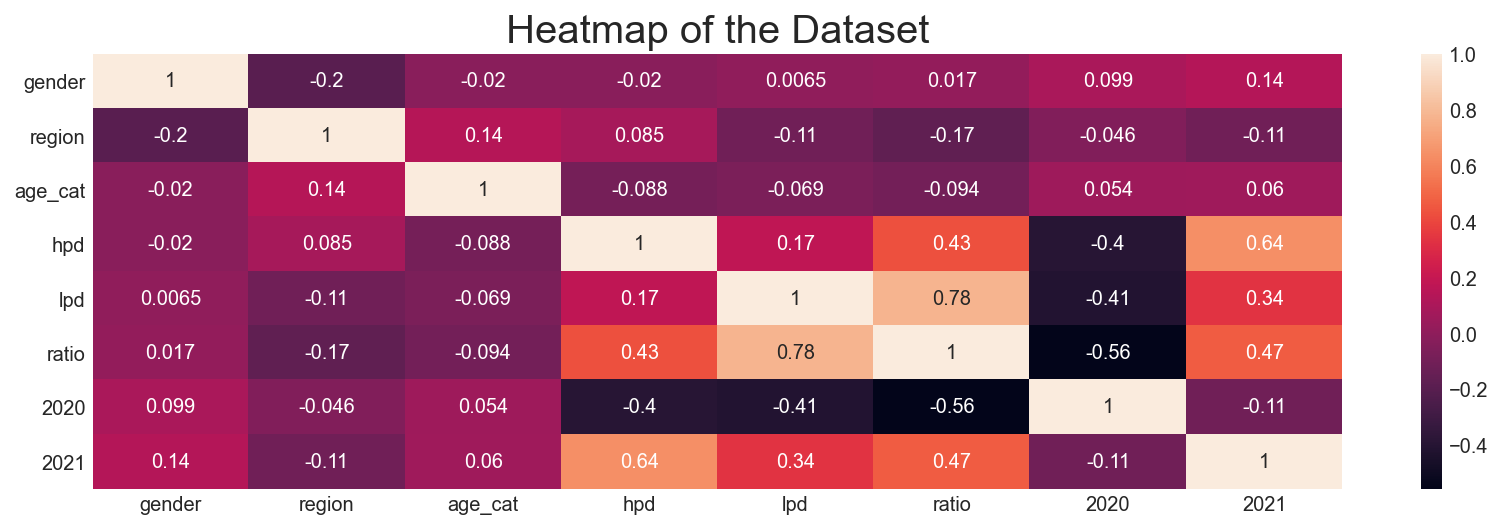

In [73]:
sns.heatmap(df[['gender','region','age_cat','hpd','lpd','ratio','2020','2021']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

인사이트

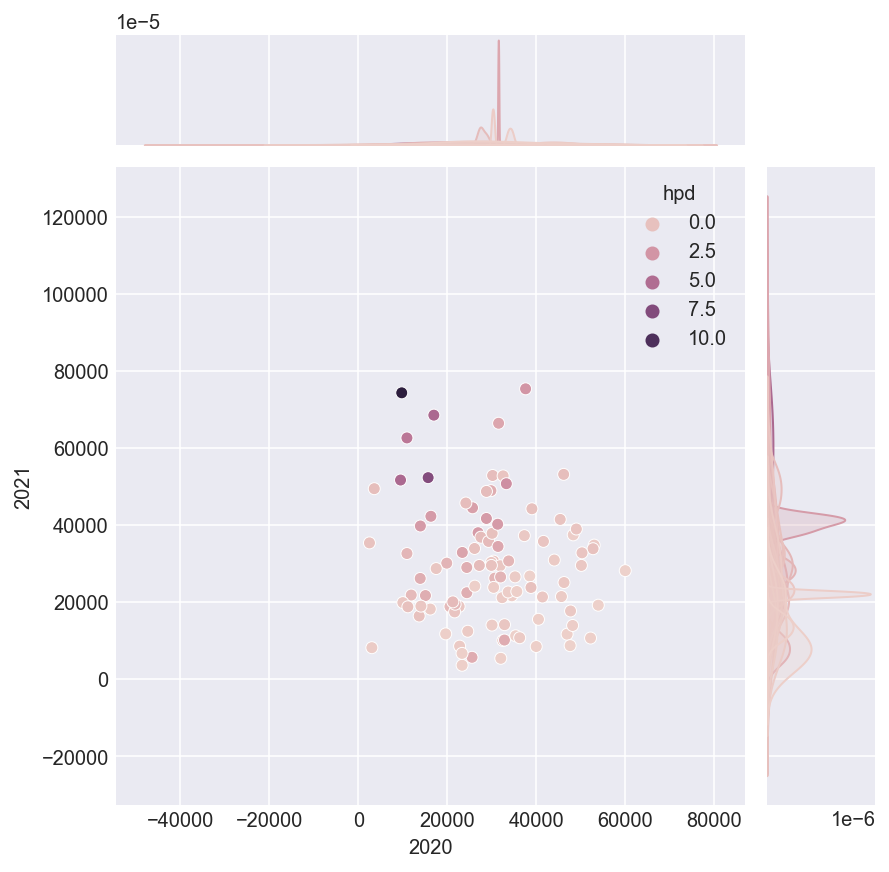

In [83]:
sns.jointplot(data=df,x='2020',y='2021',hue='hpd')

### 인사이트

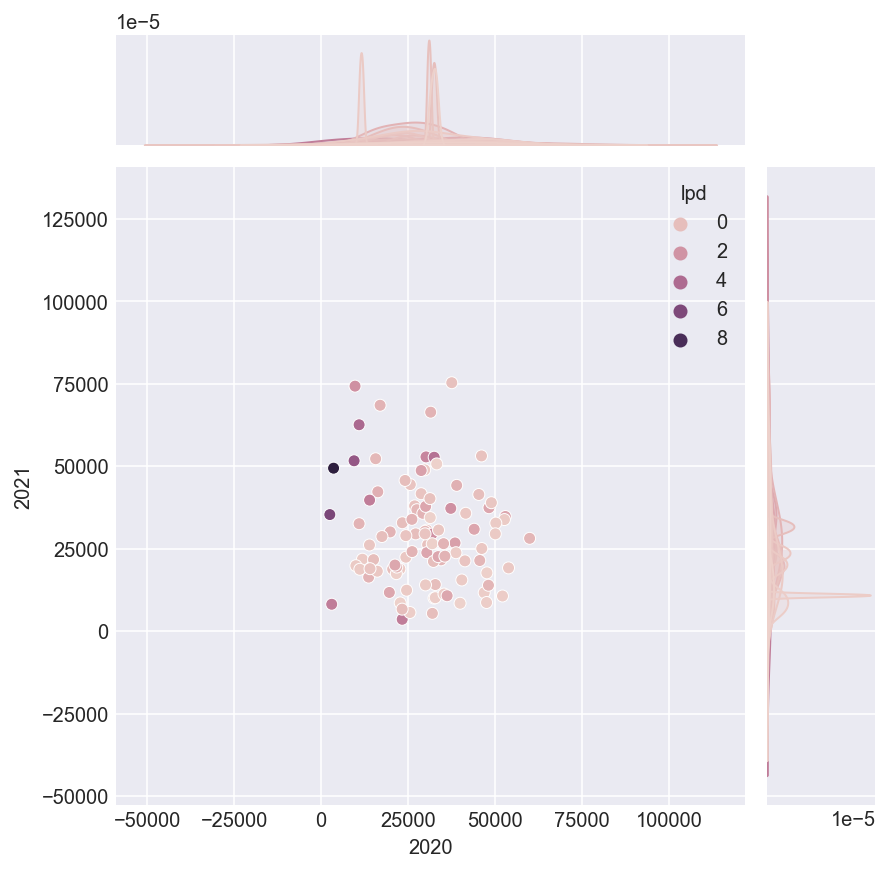

In [75]:
sns.jointplot(data=df,x='2020',y='2021',hue='lpd')

<AxesSubplot:xlabel='2020', ylabel='2021'>

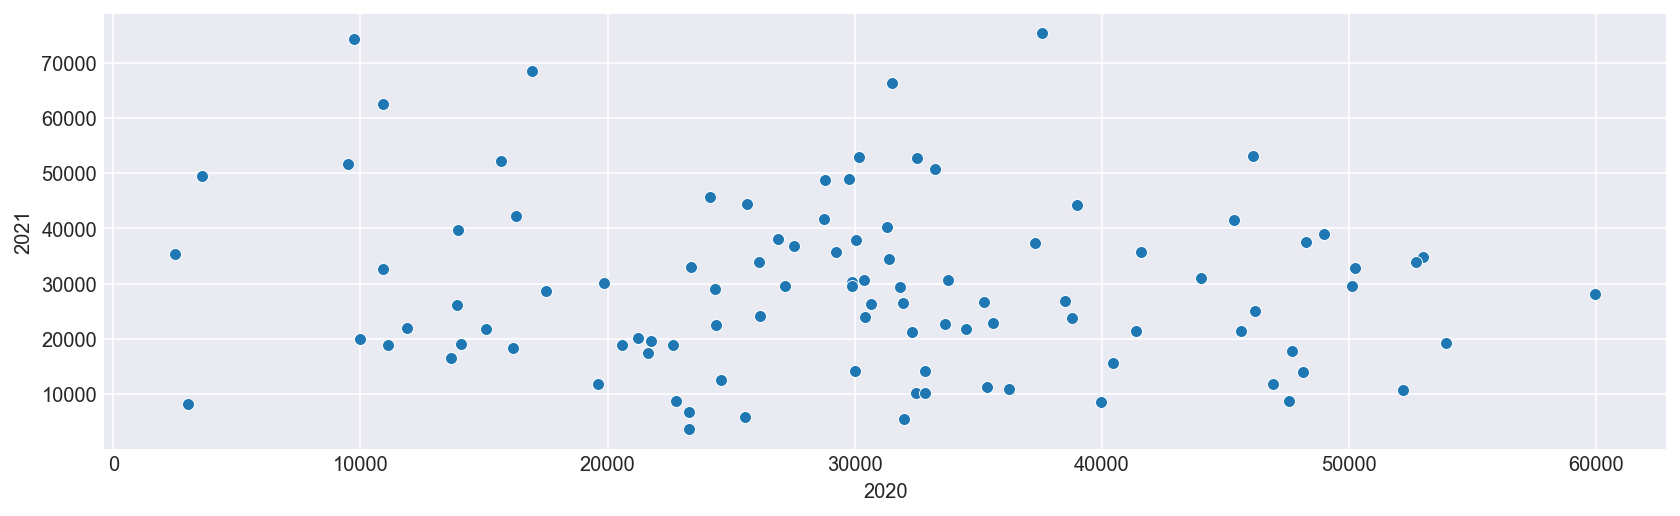

In [76]:
sns.scatterplot(data=df,x='2020',y='2021')

In [77]:
# 인사이트 탐색:
# 일반제품의 변화율인 lpd 컬럼과 구매증감율 ratio의 상관관계가 0.7 초과
df[['hpd','lpd','ratio']].corr()

,hpd,lpd,ratio
hpd,1.000000,0.174541,0.433138
lpd,0.174541,1.000000,0.776310
ratio,0.433138,0.776310,1.000000


<AxesSubplot:xlabel='hpd', ylabel='ratio'>

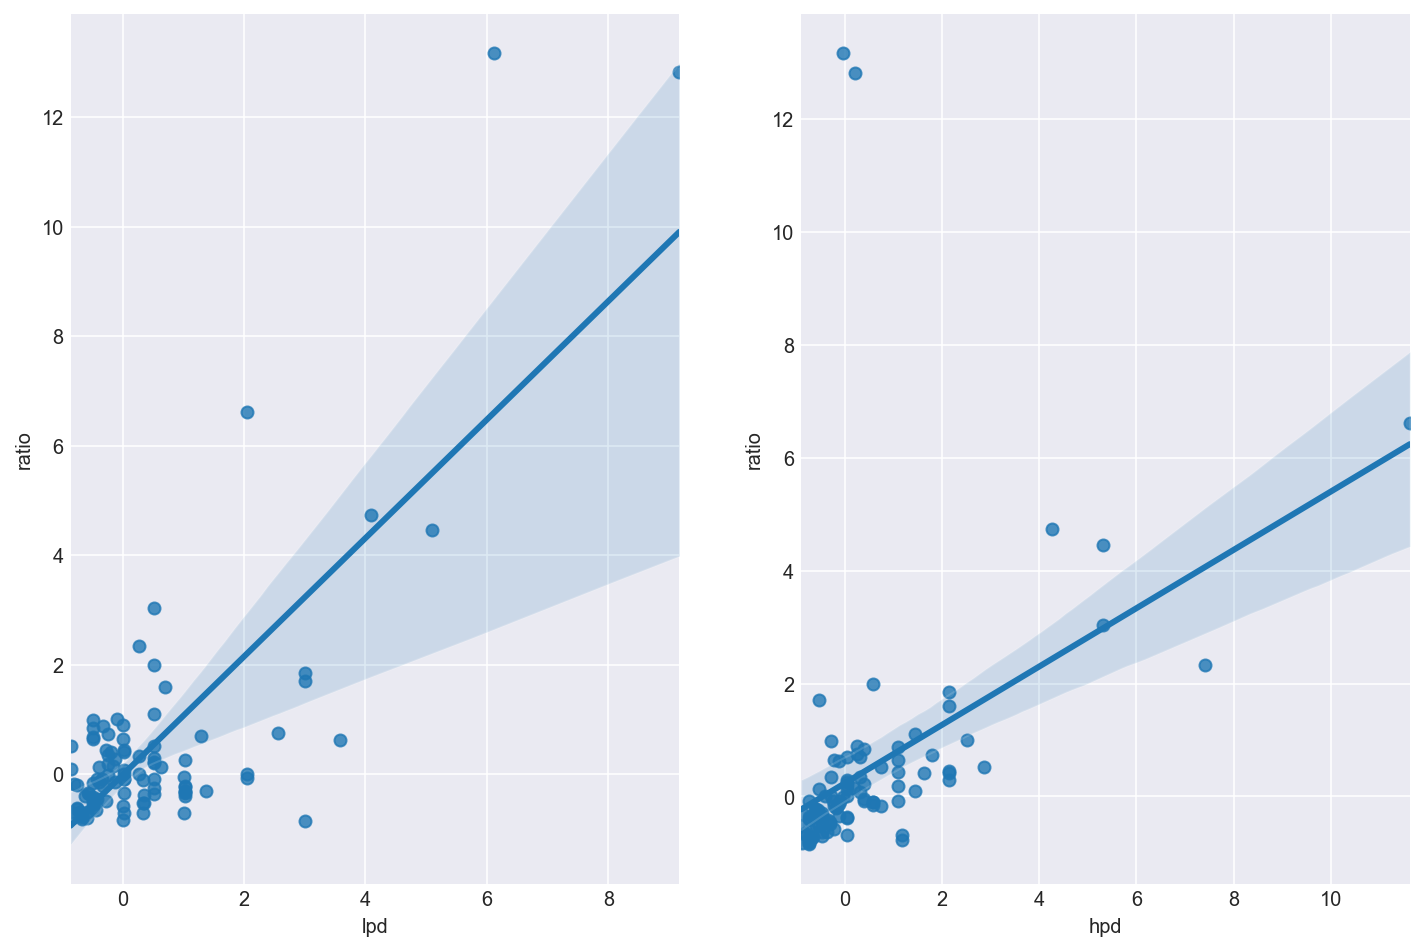

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='lpd',y='ratio',data=df,fit_reg=True,ax=ax1)
sns.regplot(x='hpd',y='ratio',data=df,fit_reg=True,ax=ax2)

In [79]:
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021,ratio
0,1,0.0,4.0,3,2.156394,-0.186399,26900.000000,38040.0,0.414126
1,2,0.0,4.0,4,4.260656,4.085006,10920.000000,62620.0,4.734432
2,3,1.0,4.0,0,0.052131,-0.854714,32470.000000,10100.0,-0.688944
3,4,0.0,3.0,4,0.052131,0.017001,30390.000000,30660.0,0.008885
4,5,0.0,5.0,3,-0.277641,0.267806,29889.081633,30330.0,0.014752


In [80]:
high = df[['hpd','2020','2021','ratio']]

<AxesSubplot:xlabel='hpd', ylabel='2020'>

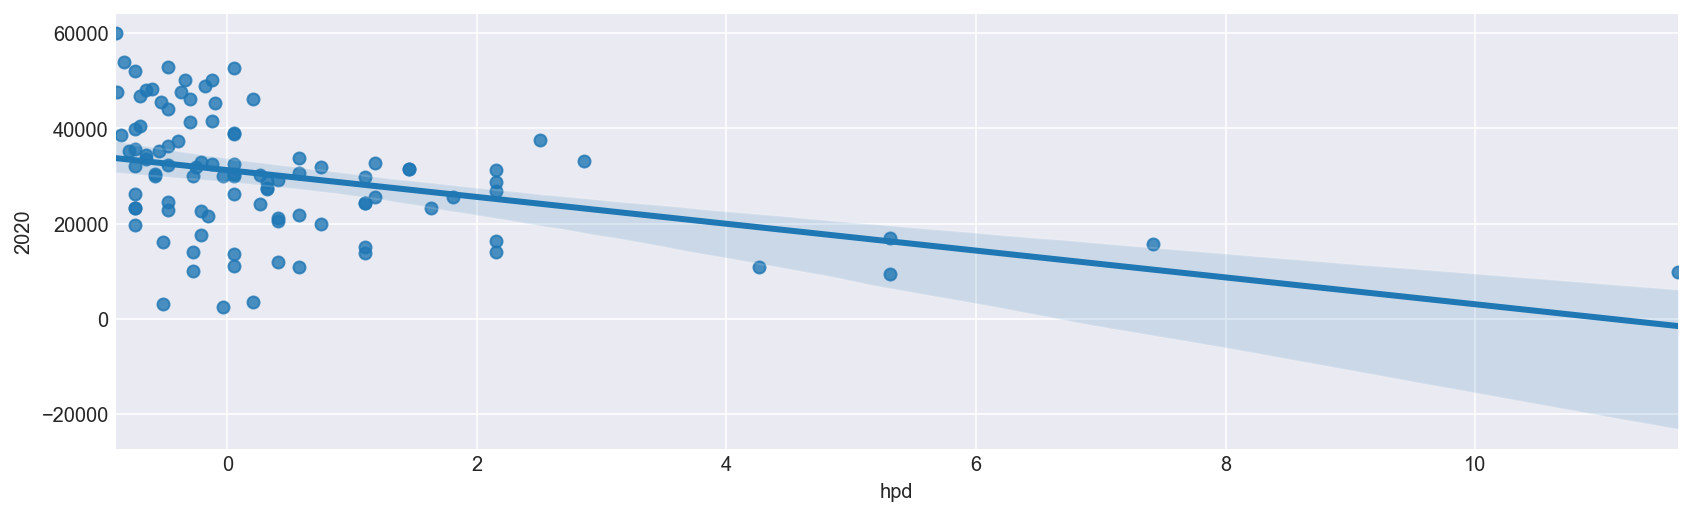

In [81]:
sns.regplot(x='hpd',y='2020',data=high,fit_reg=True)

In [82]:
# 구매감소 고객 예측 모델을 위한 데이터셋 구축
def mklable(a,b):
    if b>=a:
        return 1
    else:
        return 0
df['target'] = df.apply(lambda x : mklable(x[2020],x[2021]),axis=1)
df.head()

IndexError: index 2020 is out of bounds for axis 0 with size 9

In [ ]:
y = df['target']
X = df.drop(['no',2020,2021,'ratio','target'],axis=1)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 11)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))